In [71]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow as tf
import librosa
import tensorflow as tf
from tensorflow.keras import layers
from kymatio.sklearn import Scattering2D
import os
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [120]:
pip install kymatio

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vidya\anaconda3\python.exe -m pip install --upgrade pip' command.


In [73]:
os.listdir('C:\Data')

['classical.00051.wav',
 'classical00051.png',
 'country.00007.wav',
 'country00007.png',
 'disco.00014.wav',
 'disco00014.png',
 'features_30_sec.csv',
 'features_3_sec.csv',
 'genres_original',
 'hiphop.00032.wav',
 'hiphop00032.png',
 'images_original',
 'music.json']

In [74]:
from pydub import AudioSegment
import IPython

path ='C:\\Data\\genres_original\\blues\\blues.00000.wav'

IPython.display.Audio(path)

In [75]:
import IPython.display as ipd

In [76]:
pip install numba==0.53

  Using cached numba-0.53.0-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached llvmlite-0.36.0-cp39-cp39-win_amd64.whl (16.0 MB)


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the 'C:\Users\vidya\anaconda3\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0


In [11]:
pip install shap

Note: you may need to restart the kernel to use updated packages.  Downloading shap-0.40.0-cp39-cp39-win_amd64.whl (432 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vidya\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\vidya\anaconda3\python.exe -m pip install --upgrade pip' command.


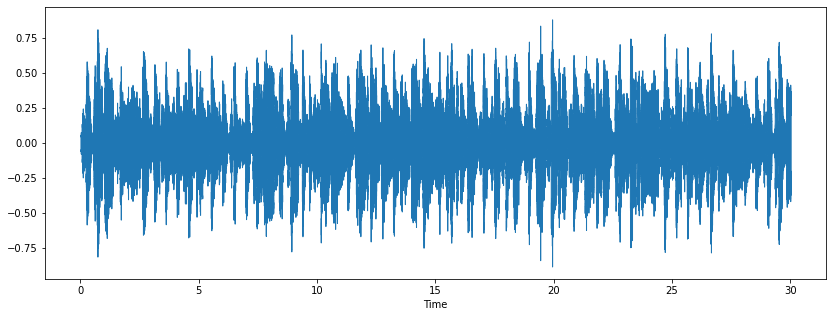

In [78]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(path)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(path)

In [79]:
data.shape

(661794,)

In [80]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=50)
print(mfccs.shape)

(50, 1293)


In [81]:
mfccs

array([[-2.40635422e+02, -2.11214355e+02, -1.93908890e+02, ...,
        -1.09999146e+02, -8.68144226e+01, -8.40735855e+01],
       [ 9.96476364e+01,  1.01042831e+02,  1.02243958e+02, ...,
         1.50079346e+02,  1.38948669e+02,  1.38309769e+02],
       [-7.40327644e+00, -8.35852814e+00,  1.91543460e+00, ...,
        -5.07951355e+01, -3.65361443e+01, -2.81363564e+01],
       ...,
       [ 4.38435936e+00,  9.44545460e+00,  1.11800747e+01, ...,
         5.33366966e+00,  5.36675596e+00,  6.61923122e+00],
       [ 3.93790674e+00,  5.50393677e+00,  3.02148104e+00, ...,
         2.65023470e-01, -1.99383497e-01, -1.51595187e+00],
       [-4.00803709e+00, -5.65769386e+00, -9.52189541e+00, ...,
        -1.77343047e+00, -5.82131052e+00, -7.28867435e+00]], dtype=float32)

In [83]:
DATASET_PATH  = 'C:\Data\genres_original'
JSON_PATH  ='C:\Data\genres_original\music.json'
sample_rate = 22050
samples_per_track = sample_rate * 30
num_segment=10

In [104]:
def preprocess(dataset_path,json_path,num_mfcc=13,n_fft=2048,hop_length=512,num_segment=5):
    data = {
            "mapping": [],
            "labels": [],
            "mfcc": []
            }
           
    scattering_transformer = Scattering2D(2, (130, 13))#scattering2D is used with dimension 130*13
    samples_per_segment = int(samples_per_track / num_segment)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    print(num_mfcc_vectors_per_segment)
    for i, (dirpath,dirnames,filenames) in enumerate(os.walk(dataset_path)):

        if dirpath != dataset_path:

            #Adding all the labels
            label = str(dirpath).split('\\')[-1]
            data["mapping"].append(label)

            print("\nInside ",label)

            #Grouping through each song within a label
            for f in filenames:
                file_path = dataset_path +"/" + str(label) + "/" + str(f)
                
                y, sr = librosa.load(file_path, sr = sample_rate)
                    

                #Cutting each song into 5 segments
                for n in range(num_segment):
                    start = samples_per_segment * n
                    finish = start + samples_per_segment
                    print(start,finish)
                    mfcc = librosa.feature.mfcc(y[start:finish], sample_rate, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
                    mfcc = mfcc.T #259 x 13
                    print(mfcc.shape)
                    scattermfcc=scattering_transformer(mfcc)#MFCC is passed as input to the scattering transform func
                    print(scattermfcc.shape)
                    data["mfcc"].append(scattermfcc.tolist())#obtained value is converted tolist()
                    data["labels"].append(i-1)
                    print("Track Name ", file_path, n+1)
                    
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)


if __name__ == "__main__":
    preprocess(DATASET_PATH,JSON_PATH,num_segment=10)
        


130

Inside  blues
0 66150
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 1
66150 132300
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 2
132300 198450
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 3
198450 264600
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 4
264600 330750
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 5
330750 396900
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 6
396900 463050
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 7
463050 529200
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 8
529200 595350
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 9
595350 661500
(130, 13)
(81, 32, 3)
Track Name  C:\Data\genres_original/blues/blues.00000.wav 10
0 66150
(130, 13)
(81, 32, 

In [87]:
def preprocess(dataset_path,json_path,num_mfcc=13,n_fft=2048,hop_length=512,num_segment=5):
    data = {
            "mapping": [],
            "labels": [],
            "mfcc": []
    }


    samples_per_segment = int(samples_per_track / num_segment)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath,dirnames,filenames) in enumerate(os.walk(dataset_path)):

        if dirpath != dataset_path:

            #Adding all the labels
            label = str(dirpath).split('\\')[-1]
            data["mapping"].append(label)

            print("\nInside ",label)

            #Gping through each song within a label
            for f in filenames:
                file_path = dataset_path +"/" + str(label) + "/" + str(f)
                y, sr = librosa.load(file_path, sr = sample_rate)

                #Cutting each song into 5 segments
                for n in range(num_segment):
                    start = samples_per_segment * n
                    finish = start + samples_per_segment
                    #print(start,finish)
                    mfcc = librosa.feature.mfcc(y[start:finish], sample_rate, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
                    mfcc = mfcc.T #259 x 13

                    #Making sure if
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("Track Name ", file_path, n+1)

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)


if __name__ == "__main__":
    preprocess(DATASET_PATH,JSON_PATH,num_segment=10)


Inside  blues
Track Name  C:\Data\genres_original/blues/blues.00000.wav 1
Track Name  C:\Data\genres_original/blues/blues.00000.wav 2
Track Name  C:\Data\genres_original/blues/blues.00000.wav 3
Track Name  C:\Data\genres_original/blues/blues.00000.wav 4
Track Name  C:\Data\genres_original/blues/blues.00000.wav 5
Track Name  C:\Data\genres_original/blues/blues.00000.wav 6
Track Name  C:\Data\genres_original/blues/blues.00000.wav 7
Track Name  C:\Data\genres_original/blues/blues.00000.wav 8
Track Name  C:\Data\genres_original/blues/blues.00000.wav 9
Track Name  C:\Data\genres_original/blues/blues.00000.wav 10
Track Name  C:\Data\genres_original/blues/blues.00001.wav 1
Track Name  C:\Data\genres_original/blues/blues.00001.wav 2
Track Name  C:\Data\genres_original/blues/blues.00001.wav 3
Track Name  C:\Data\genres_original/blues/blues.00001.wav 4
Track Name  C:\Data\genres_original/blues/blues.00001.wav 5
Track Name  C:\Data\genres_original/blues/blues.00001.wav 6
Track Name  C:\Data\genr

In [106]:
data_path = 'C:\Data\genres_original\music.json'

def load_data(data_path):
    print("Data loading\n")
    with open(data_path, "r") as fp:
        data = json.load(fp)

    x = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Loaded Data")

    return x, y

In [107]:
def prepare_datasets(test_size,val_size):

    #load the data
    x, y = load_data(data_path)

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = test_size)
    x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = val_size)

    return x_train, x_val, x_test, y_train, y_val, y_test

Model training and activation funtion

In [108]:
def build_model(input_shape):


    model = tf.keras.Sequential()

    model.add(tf.keras.layers.LSTM(64, input_shape = input_shape, return_sequences = True))
    model.add(tf.keras.layers.LSTM(64))

    model.add(tf.keras.layers.Dense(64, activation="relu"))#activation function RelU is considered
    #model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(10,activation = "softmax"))#activation function SoftMax is considered

    return model

In [92]:
if __name__ == "__main__":


    x_train, x_val, x_test, y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

    print(x_train.shape[0])

    input_shape = (x_train.shape[1],x_train.shape[2])
    model = build_model(input_shape)

    # compile model
    optimiser = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) #sparse_categorical_crossentropy used as a loss function for multi-class 
                                        #classification model because the output is having integer value

    model.summary()

    

Data loading

Loaded Data
5376
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [109]:
# train model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=30)
# plot accuracy/error for training and validation
#plot_history(history)
# evaluate model on test set

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
model.save("model_RNN_LSTM.h5")
print("Saved model to disk") 

Epoch 1/30
168/168 [==============================] - 28s 148ms/step - loss: 0.1039 - accuracy: 0.9637 - val_loss: 0.8421 - val_accuracy: 0.7857
Epoch 2/30
168/168 [==============================] - 22s 131ms/step - loss: 0.0948 - accuracy: 0.9689 - val_loss: 0.8443 - val_accuracy: 0.7932
Epoch 3/30
168/168 [==============================] - 22s 131ms/step - loss: 0.0895 - accuracy: 0.9708 - val_loss: 0.9907 - val_accuracy: 0.7612
Epoch 4/30
168/168 [==============================] - 21s 126ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.8361 - val_accuracy: 0.7946
Epoch 5/30
168/168 [==============================] - 22s 131ms/step - loss: 0.0362 - accuracy: 0.9900 - val_loss: 0.8200 - val_accuracy: 0.8237
Epoch 6/30
168/168 [==============================] - 22s 128ms/step - loss: 0.0861 - accuracy: 0.9714 - val_loss: 0.8681 - val_accuracy: 0.7969
Epoch 7/30
168/168 [==============================] - 21s 126ms/step - loss: 0.0873 - accuracy: 0.9704 - val_loss: 0.8040 - val_ac

In [82]:
pip install mp3towav 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mp3towav (from versions: none)
ERROR: No matching distribution found for mp3towav
You should consider upgrading via the 'C:\Users\vidya\anaconda3\python.exe -m pip install --upgrade pip' command.


Prediction of the model:

In [95]:
###########################################################################
just_path = 'C:\\Data\\genres_original\\blues'
song_path = 'C:\\Data\\genres_original\\blues\\blues.00000.wav'
song_name = "1"
##########################################################################

#Constants which depend on the model. If you train the model with different values,
#need to change those values here too
num_mfcc = 13
n_fft=2048
hop_length = 512
sample_rate = 22050
samples_per_track = sample_rate * 30
num_segment = 10

In [96]:

#Constants which depend on the model. If you train the model with different values,
#need to change those values here too
num_mfcc = 13
n_fft=2048
hop_length = 512
sample_rate = 22050
samples_per_track = sample_rate * 30
num_segment = 10
############################################################################

if __name__=="__main__":

    model = tf.keras.models.load_model("model_RNN_LSTM.h5")
    model.summary()

    classes = ["Blues","Classical","Country","Disco","Hiphop",
                "Metal","Pop","Reggae","Rock"]

    class_predictions = []

    samples_per_segment = int(samples_per_track / num_segment)


    if song_path.endswith('.mp3'):
        path_to_save = just_path + song_name+".wav"
        convert_to_wav(song_path,path_to_save)
        song_path = path_to_save
    else:
        pass

    #load the song
    y, sr = librosa.load(song_path, sr = sample_rate)
    song_length = int(librosa.get_duration(filename=song_path))

    prediction_per_part = []

    flag = 0
    if song_length > 30:
        print("Song is greater than 30 seconds")
        samples_per_track_30 = sample_rate * song_length
        parts = int(song_length/30)
        samples_per_segment_30 = int(samples_per_track_30 / (parts))
        flag = 1
        print("Song sliced into "+str(parts)+" parts")
    elif song_length == 30:
        parts = 1
        flag = 0
    else:
        print("Too short, enter a song of length minimum 30 seconds")
        flag = 2

    for i in range(0,parts):
        if flag == 1:
            print("Song snippet ",i+1)
            start30 = samples_per_segment_30 * i
            finish30 = start30 + samples_per_segment_30
            y = x[start30:finish30]
            #print(len(y))
        elif flag == 0:
            print("Song is 30 seconds, no slicing")

        

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Song is 30 seconds, no slicing


In [97]:
if __name__=="__main__":

    model = tf.keras.models.load_model("model_RNN_LSTM.h5")
    model.summary()

    classes = ["Blues","Classical","Country","Disco","Hiphop",
                "Metal","Pop","Reggae","Rock"]
    for n in range(num_segment):
            start = samples_per_segment * n
            finish = start + samples_per_segment
            #print(len(y[start:finish]))
            mfcc = librosa.feature.mfcc(y[start:finish], sample_rate, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
            mfcc = mfcc.T
            #print(mfcc.shape)
            mfcc = mfcc.reshape(1, mfcc.shape[0], mfcc.shape[1])
            #print(mfcc.shape)
            array = model.predict(mfcc)*100
            array = array.tolist()

            #find maximum percentage class predicted
            class_predictions.append(array[0].index(max(array[0])))

            occurence_dict = {}
            for i in class_predictions:
                if i not in occurence_dict:
                    occurence_dict[i] = 1
                else:
                    occurence_dict[i] +=1

            max_key = max(occurence_dict, key=occurence_dict.get)
            prediction_per_part.append(classes[max_key])

    #print(prediction_per_part)
    prediction = max(set(prediction_per_part), key = prediction_per_part.count)
    print(prediction)

    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Blues


#model predicted the genre as blue for the given input

In [99]:
def plot_history(history):

    fig, axs = plt.subplots(2)


    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



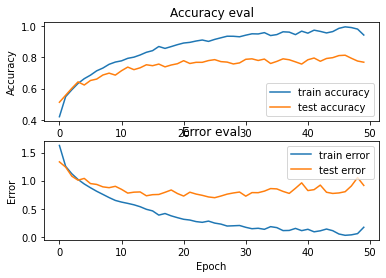

In [100]:
plot_history(history)